In [53]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
print(gpd.__version__)   ## 0.5

0.10.2


In [54]:
ax = plt.axes(projection=background.crs)
ax.set_extent([-80, -30, -35, 10])
ax.add_image(background,9)

# adicionando um marker sobre o plot na longitude -52 e lat -16
ax.plot(-52,-16,
        marker='x',
        color='red',
        markersize=12,
        transform=ccrs.Geodetic())
        
plt.show()
             

NameError: name 'background' is not defined

C:\Users\Deja\AppData\Local\Temp/ipykernel_5764/299269088.py:26: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
C:\Users\Deja\AppData\Local\Temp/ipykernel_5764/299269088.py:27: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


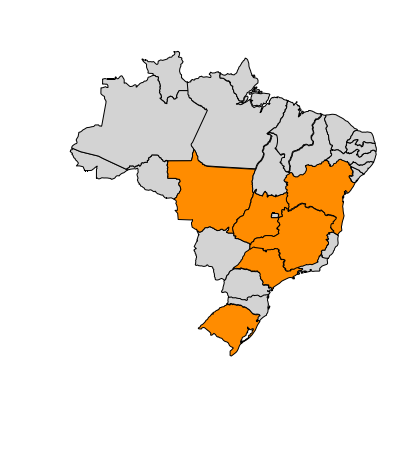

In [44]:
from cartopy.io import shapereader


kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

from __future__ import unicode_literals

states = ('Minas Gerais', 'Mato Grosso', 'Goiás',
          'Bahia', 'Rio Grande do Sul', 'São Paulo')


import cartopy.crs as ccrs
import matplotlib.pyplot as plt


subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-82, -32, -45, 10])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    if name in states:
        facecolor = 'DarkOrange'
    else:
        facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')
    
 

C:\Users\Deja\AppData\Local\Temp/ipykernel_5764/32096559.py:28: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  stamen_terrain              = cimgt.StamenTerrain()
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-pa

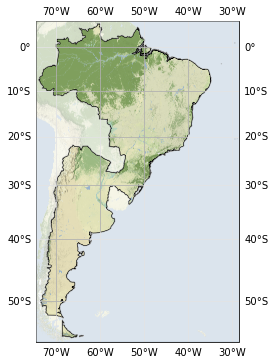

C:\Users\Deja\AppData\Local\Temp/ipykernel_5764/32096559.py:28: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  stamen_terrain              = cimgt.StamenTerrain()
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-pa

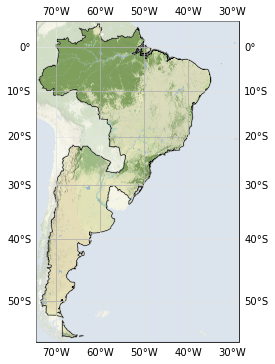

C:\Users\Deja\AppData\Local\Temp/ipykernel_5764/32096559.py:28: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  stamen_terrain              = cimgt.StamenTerrain()
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-pa

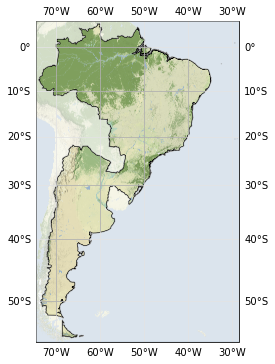

In [52]:
from shapely.geometry import Polygon
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
import geopandas
import matplotlib.pyplot as plt


def rect_from_bound(xmin, xmax, ymin, ymax):
    """Returns list of (x,y)'s for a rectangle"""
    xs = [xmax, xmin, xmin, xmax, xmax]
    ys = [ymax, ymax, ymin, ymin, ymax]
    return [(x, y) for x, y in zip(xs, ys)]

# request data for use by geopandas
resolution          = '10m'
category            = 'cultural'
name                = 'admin_0_countries'
countries           = ['Brazil', 'Argentina', 'Uruguai']
shpfilename         = shapereader.natural_earth(resolution, category, name)
df                  = geopandas.read_file(shpfilename)
extent              = [2, 32, 55, 82]
# get geometry of a country
for country in (countries):
    scan3 = df[ df['ADMIN'].isin(['Brazil', 'Argentina', 'Uruguai']) ]
    scan3_dissolved = scan3.dissolve(by='LEVEL')
    poly = [scan3_dissolved['geometry'].values[0]]
    stamen_terrain              = cimgt.StamenTerrain()
    # projections that involved
    st_proj = stamen_terrain.crs  #projection used by Stamen images
    ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat
    # create fig and axes using intended projection
    fig = plt.figure(figsize=(8,9))
    ax = fig.add_subplot(122, projection=st_proj)
    ax.add_geometries(poly, crs=ll_proj, facecolor='none', edgecolor='black')
    pad1 = 0.5  #padding, degrees unit
    exts = [poly[0].bounds[0] - pad1, poly[0].bounds[2] + pad1, poly[0].bounds[1] - pad1, poly[0].bounds[3] + pad1];
    ax.set_extent(exts, crs=ll_proj)
    # make a mask polygon by polygon's difference operation
    # base polygon is a rectangle, another polygon is simplified switzerland
    msk = Polygon(rect_from_bound(*exts)).difference( poly[0].simplify(0.01) )
    msk_stm  = st_proj.project_geometry (msk, ll_proj)  # project geometry to the projection used by stamen
    # get and plot Stamen images
    ax.add_image(stamen_terrain, 8) # this requests image, and plot
    # plot the mask using semi-transparency (alpha=0.65) on the masked-out portion
    ax.add_geometries( msk_stm, st_proj, zorder=12, facecolor='white', edgecolor='none', alpha=0.65)
    ax.gridlines(draw_labels=True)
    plt.show()

C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\

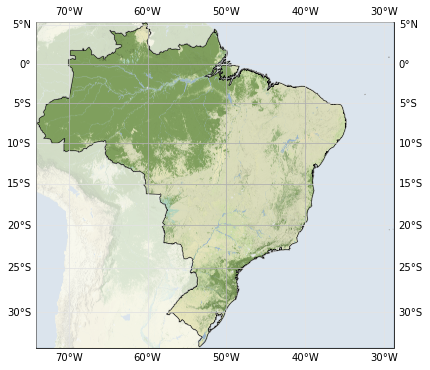

In [45]:
from shapely.geometry import Polygon
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
import geopandas
import matplotlib.pyplot as plt

def rect_from_bound(xmin, xmax, ymin, ymax):
    """Returns list of (x,y)'s for a rectangle"""
    xs = [xmax, xmin, xmin, xmax, xmax]
    ys = [ymax, ymax, ymin, ymin, ymax]
    return [(x, y) for x, y in zip(xs, ys)]

# request data for use by geopandas
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)
df = geopandas.read_file(shpfilename)

# get geometry of a country
poly = [df.loc[df['ADMIN'] == 'Brazil']['geometry'].values[0]]

stamen_terrain = cimgt.Stamen('terrain-background')

# projections that involved
st_proj = stamen_terrain.crs  #projection used by Stamen images
ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat

# create fig and axes using intended projection
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection=st_proj)
ax.add_geometries(poly, crs=ll_proj, facecolor='none', edgecolor='black')

pad1 = .1  #padding, degrees unit
exts = [poly[0].bounds[0] - pad1, poly[0].bounds[2] + pad1, poly[0].bounds[1] - pad1, poly[0].bounds[3] + pad1];
ax.set_extent(exts, crs=ll_proj)

# make a mask polygon by polygon's difference operation
# base polygon is a rectangle, another polygon is simplified switzerland
msk = Polygon(rect_from_bound(*exts)).difference( poly[0].simplify(0.01) )
msk_stm  = st_proj.project_geometry (msk, ll_proj)  # project geometry to the projection used by stamen

# get and plot Stamen images
ax.add_image(stamen_terrain, 8) # this requests image, and plot

# plot the mask using semi-transparency (alpha=0.65) on the masked-out portion
ax.add_geometries( msk_stm, st_proj, zorder=12, facecolor='white', edgecolor='none', alpha=0.65)

ax.gridlines(draw_labels=True)

plt.show()

C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\

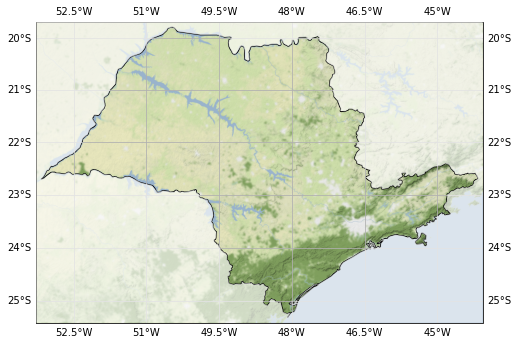

In [46]:
from shapely.geometry import Polygon
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
import geopandas
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader 

def rect_from_bound(xmin, xmax, ymin, ymax):
    """Returns list of (x,y)'s for a rectangle"""
    xs = [xmax, xmin, xmin, xmax, xmax]
    ys = [ymax, ymax, ymin, ymin, ymax]
    return [(x, y) for x, y in zip(xs, ys)]

# request data for use by geopandas
resolution = '10m'
category = 'cultural'
name = 'admin_1_states_provinces'

shpfilename = shapereader.natural_earth(resolution, category,name)

df = geopandas.read_file(shpfilename)

# get geometry of a country
poly = [df.loc[df['name'] == 'São Paulo']['geometry'].values[0]]

stamen_terrain = cimgt.Stamen('terrain-background')

# projections that involved
st_proj = stamen_terrain.crs  #projection used by Stamen images
ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat

# create fig and axes using intended projection
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection=st_proj)
ax.add_geometries(poly, crs=ll_proj, facecolor='none', edgecolor='black')


pad1 = .1  #padding, degrees unit
exts = [poly[0].bounds[0] - pad1, poly[0].bounds[2] + pad1, poly[0].bounds[1] - pad1, poly[0].bounds[3] + pad1];
ax.set_extent(exts, crs=ll_proj)

# make a mask polygon by polygon's difference operation
# base polygon is a rectangle, another polygon is simplified switzerland
msk = Polygon(rect_from_bound(*exts)).difference( poly[0].simplify(0.01) )
msk_stm  = st_proj.project_geometry (msk, ll_proj)  # project geometry to the projection used by stamen

# get and plot Stamen images
ax.add_image(stamen_terrain, 8) # this requests image, and plot

# plot the mask using semi-transparency (alpha=0.65) on the masked-out portion
ax.add_geometries( msk_stm, st_proj, zorder=12, facecolor='white', edgecolor='none', alpha=0.65)

ax.gridlines(draw_labels=True)

plt.show()

In [47]:
#mostra a lista de estados ou paises dentro do shapefile
#Sempre pegar o nome na col das cidades ou paises
df.head(5)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-1 scale rank,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 scale rank,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."
2,Admin-1 scale rank,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,Admin-1 scale rank,6,MYS-1186,1186,MY-12,None,MY,5,Sabah,North Borneo,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,Admin-1 scale rank,3,CHL-2694,2694,CL-AP,None,CL,1,Arica y Parinacota,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."


Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-22 00:00:00 UTC


C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\feature\__init__.py:217: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._geoms = tuple(geometries)
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\feature\__init__.py:217: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  self._geoms = tuple(geometries)
C:\Users\Deja\anaconda3\envs\curso_arcgis\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users

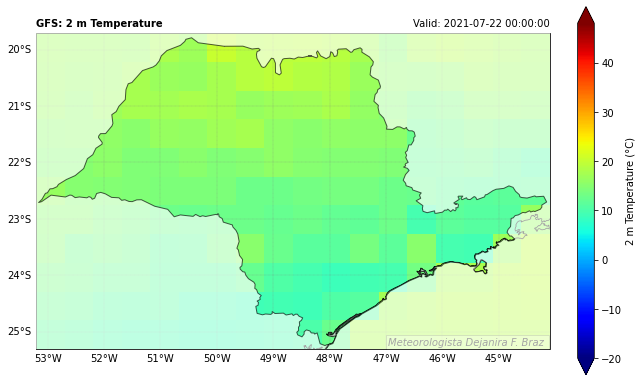

In [48]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 4: Adding a Map with Cartopy 
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt      # Plotting library
import cartopy, cartopy.crs as ccrs  # Plot maps
import numpy as np                   # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 
# Open the GRIB file

grib = pygrib.open("C:/Users/Deja/Documents/Python Scripts/teste/Curso 14_07_2021/Samples/gfs.t00z.pgrb2.0p50.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-53.2, -25.3, -44.1, -19.7]


# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent [min. lon, max. lon, min. lat, max. lat]
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 1), ylocs=np.arange(-90, 90, 1), draw_labels=True)
gl.top_labels = False
gl.right_labels = False


# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')
# plot the mask using semi-transparency (alpha=0.65) on the masked-out portion
ax.add_geometries( msk_stm, st_proj, zorder=12, facecolor='white', edgecolor='black', alpha=0.65)
ax.text(0.995, 0.004, 'Meteorologista Dejanira F. Braz ',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,bbox={'facecolor':'white', 'alpha':0.3, 'pad':2},
        color='black', style='italic', fontsize=10)
# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.03)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('mask_SP.pdf')

# Show the image
plt.show()

In [ ]:
from cartopy.io import shapereader


kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

from __future__ import unicode_literals

states = ('Minas Gerais', 'Mato Grosso', 'Goiás',
          'Bahia', 'Rio Grande do Sul', 'São Paulo')


import cartopy.crs as ccrs
import matplotlib.pyplot as plt


subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-82, -32, -45, 10])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    if name in states:
        facecolor = 'DarkOrange'
    else:
        facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')
    
 

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 4: Adding a Map with Cartopy 
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt      # Plotting library
import cartopy, cartopy.crs as ccrs  # Plot maps
import numpy as np                   # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 
# Open the GRIB file

grib = pygrib.open("C:/Users/Deja/Documents/Python Scripts/teste/Curso 14_07_2021/Samples/gfs.t00z.pgrb2.0p50.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-82, -32, -45, 10]


# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15



import cartopy.crs as ccrs
import matplotlib.pyplot as plt


subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-82, -32, -45, 10])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    if name in states:
        facecolor = 'none'
    else:
        facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')
    


# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

ax.text(0.995, 0.004, 'Meteorologista Dejanira F. Braz ',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,bbox={'facecolor':'white', 'alpha':0.3, 'pad':2},
        color='black', style='italic', fontsize=10)
# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.03)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('mask_SP.pdf')

# Show the image
plt.show()

Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-22 00:00:00 UTC

Array dimensions before smoothing:
(151, 131)
Array dimensions after smoothing:
(453, 393)


C:\Users\Deja\AppData\Local\Temp/ipykernel_7596/211392293.py:77: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
C:\Users\Deja\AppData\Local\Temp/ipykernel_7596/211392293.py:78: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


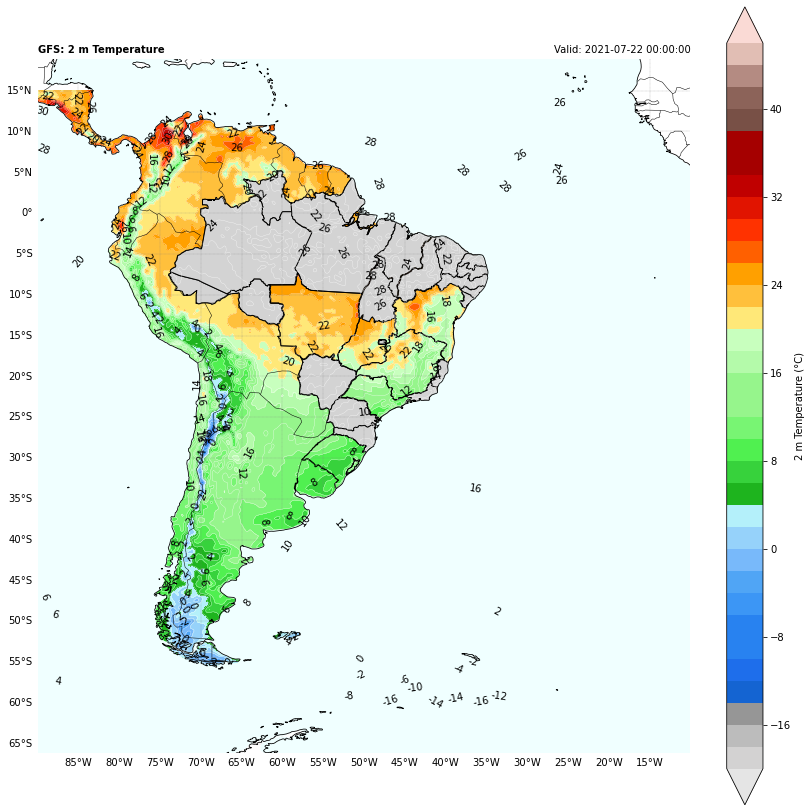

In [1]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 8: Smoothing the Contours  
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python 
import cartopy.feature as cfeature
#----------------------------------------------------------------------------------------------------------- 

# Open the GRIB file
grib = pygrib.open("C:/Users/Deja/Documents/Python Scripts/teste/Curso 14_07_2021/Samples/gfs.t00z.pgrb2.0p50.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-90.0, -60.00, -10.00, 15.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

print("\nArray dimensions before smoothing:")
print(tmtmp.shape)

# Smooth the contours
import scipy.ndimage
tmtmp = scipy.ndimage.zoom(tmtmp, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

print("Array dimensions after smoothing:")
print(tmtmp.shape)
#-----------------------------------------------------------------------------------------------------------
from cartopy.io import shapereader


kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

from __future__ import unicode_literals

states = ('Minas Gerais', 'Mato Grosso', 'Goiás',
          'Bahia', 'Rio Grande do Sul', 'São Paulo','argentina')


import cartopy.crs as ccrs
import matplotlib.pyplot as plt


subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(13,18),
                       subplot_kw=subplot_kw)
ax.set_extent([-90.0, -10.00, -60.00, 15.00])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.add_feature(cfeature.OCEAN, facecolor='azure', zorder=3)

ax.text(0.995, 0.004, 'Meteorologista Dejanira F. Braz ',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,bbox={'facecolor':'white', 'alpha':0.3, 'pad':2},
        color='black', style='italic', fontsize=10)

# Adiciona linhas costeiras, fronteiras e linhas de grade
ax.coastlines(resolution='50m', color='black', linewidth=0.8, zorder=5)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5, zorder=6)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
    
for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    if name in states:
        facecolor = 'none'
    else:
        facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')
    
 
# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)

ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_8.png')

# Show the image
plt.show()

In [5]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 8: Smoothing the Contours  
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python 
import cartopy.feature as cfeature
from cartopy.io import shapereader
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
#----------------------------------------------------------------------------------------------------------- 

In [11]:
#----------------------------------------------------------------------------------------------------------- 

# Open the GRIB file
grib = pygrib.open("C:/Users/Deja/Documents/Geopandas/curso_INPE/Curso 14_07_2021/Samples/gfs.t00z.pgrb2.0p25.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-90.0, -60.00, -10.00, 15.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

Init: 2021-12-13 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-12-13 00:00:00 UTC


In [12]:
#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

print("\nArray dimensions before smoothing:")
print(tmtmp.shape)

# Smooth the contours
import scipy.ndimage
tmtmp = scipy.ndimage.zoom(tmtmp, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

print("Array dimensions after smoothing:")
print(tmtmp.shape)
#-----------------------------------------------------------------------------------------------------------


Array dimensions before smoothing:
(301, 261)
Array dimensions after smoothing:
(903, 783)


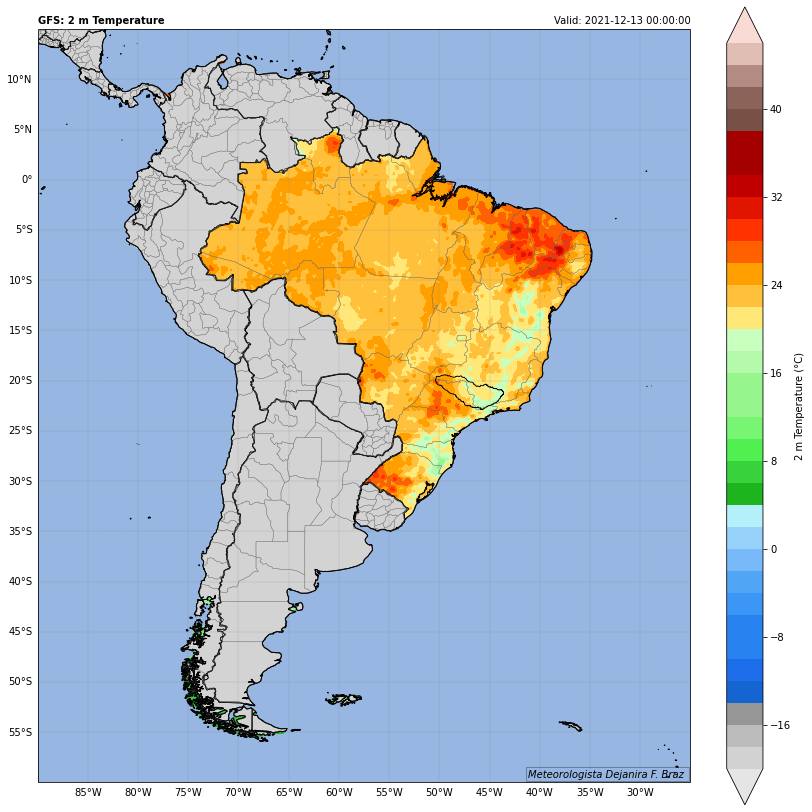

In [20]:
kw = dict(resolution='10m', category='cultural',
          name='admin_0_countries')

states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

from __future__ import unicode_literals

states = ('Brazil')



subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(13,18),subplot_kw=subplot_kw)

for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['ADMIN']
    if name in states:
        facecolor = 'none'
    else:
        facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')
 
#Remove as bordas do mapa   
#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(True)



#Shapefile
shapefile = list(shpreader.Reader('ne_10m_admin_1_states_provinces.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='dimgray',facecolor='none', linewidth=0.3, zorder=4)

shapefile1 = list(shpreader.Reader('Grande.shp').geometries())
ax.add_geometries(shapefile1, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.8, zorder=6)


# Adiciona linhas costeiras, fronteiras e linhas de grade
ax.coastlines(resolution='50m', color='black', linewidth=0.8, zorder=5)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5, zorder=6)
ax.add_feature(cfeature.OCEAN, zorder=1, alpha=1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
    

    
# Define de contour interval

data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
#img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)

#ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')
ax.text(0.995, 0.004, 'Meteorologista Dejanira F. Braz ',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,bbox={'facecolor':'none', 'alpha':0.3, 'pad':2},
        color='black', style='italic', fontsize=10)

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')

#----------------------------------------------------------------------------------------------------------- 

# Save the image
plt.savefig('image_8.png',dpi=500, bbox_inches='tight')

# Show the image
plt.show()

<AxesSubplot:>

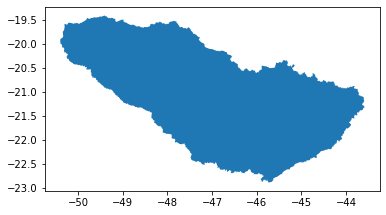

In [23]:
import geopandas as gpd
from shapely.geometry import Point

#Abrindo o shapefile da área de interesse
area = gpd.read_file(r'Grande.shp')

#Plotando o shapefile da área de interesse
area.plot()

Init: 2021-12-13 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-12-13 00:00:00 UTC


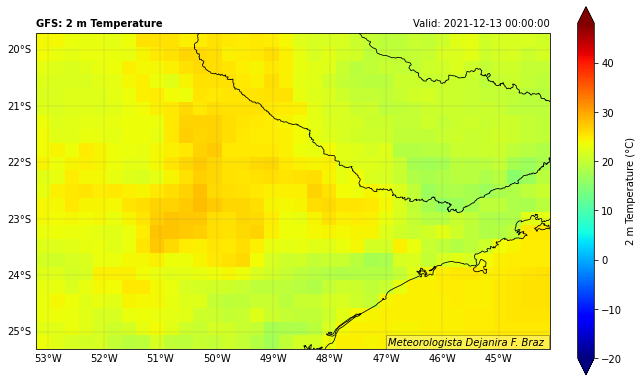

In [26]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 4: Adding a Map with Cartopy 
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt      # Plotting library
import cartopy, cartopy.crs as ccrs  # Plot maps
import numpy as np                   # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 
# Open the GRIB file
grib = pygrib.open("C:/Users/Deja/Documents/Geopandas/curso_INPE/Curso 14_07_2021/Samples/gfs.t00z.pgrb2.0p25.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')




# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent [min. lon, max. lon, min. lat, max. lat]
img_extent = [extent[0], extent[2], extent[1], extent[3]]

shapefile = list(shpreader.Reader('Grande.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.8, zorder=6)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 1), ylocs=np.arange(-90, 90, 1), draw_labels=True)
gl.top_labels = False
gl.right_labels = False


# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')
# plot the mask using semi-transparency (alpha=0.65) on the masked-out portion

ax.text(0.995, 0.004, 'Meteorologista Dejanira F. Braz ',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,bbox={'facecolor':'white', 'alpha':0.3, 'pad':2},
        color='black', style='italic', fontsize=10)
# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.03)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('mask_SP.pdf')

# Show the image
plt.show()